### Importación de datos



In [79]:
import pandas as pd


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [80]:
import pandas as pd

# Diccionario con todas las tiendas
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

In [81]:
ingresos_df = pd.DataFrame({
    "Tienda": list(tiendas.keys()),
    "Ingreso Total": [df["Precio"].sum() for df in tiendas.values()]
})

print(ingresos_df)

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


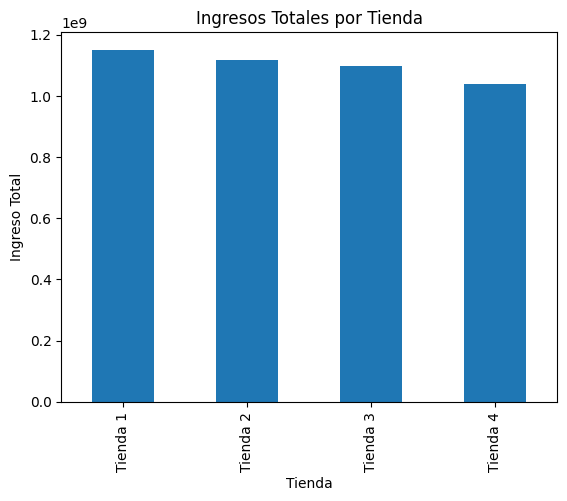

In [82]:
import matplotlib.pyplot as plt

# Ingresos por tienda
ingresos_df.plot(kind="bar", x="Tienda", y="Ingreso Total", legend=False, title="Ingresos Totales por Tienda")
plt.ylabel("Ingreso Total")
plt.show()


A partir el calculo se puede evidenciar los ingresos totales por cada una de las tiendas

# 2. Ventas por categoría

In [83]:
for nombre, df in tiendas.items():
    print(f"{nombre}: {df.columns.tolist()}")

Tienda 1: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Tienda 2: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Tienda 3: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Tienda 4: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']


In [84]:
df_todas = pd.concat([
    df.assign(Tienda=tienda)
    for tienda, df in tiendas.items()
])

categorias_df = df_todas.groupby(
    ["Tienda", "Categoría del Producto"]
)["Producto"].count().reset_index(name="Cantidad")

print(categorias_df.head(32))

      Tienda   Categoría del Producto  Cantidad
0   Tienda 1  Artículos para el hogar       171
1   Tienda 1     Deportes y diversión       284
2   Tienda 1        Electrodomésticos       312
3   Tienda 1             Electrónicos       448
4   Tienda 1   Instrumentos musicales       182
5   Tienda 1                 Juguetes       324
6   Tienda 1                   Libros       173
7   Tienda 1                  Muebles       465
8   Tienda 2  Artículos para el hogar       181
9   Tienda 2     Deportes y diversión       275
10  Tienda 2        Electrodomésticos       305
11  Tienda 2             Electrónicos       422
12  Tienda 2   Instrumentos musicales       224
13  Tienda 2                 Juguetes       313
14  Tienda 2                   Libros       197
15  Tienda 2                  Muebles       442
16  Tienda 3  Artículos para el hogar       177
17  Tienda 3     Deportes y diversión       277
18  Tienda 3        Electrodomésticos       278
19  Tienda 3             Electrónicos   

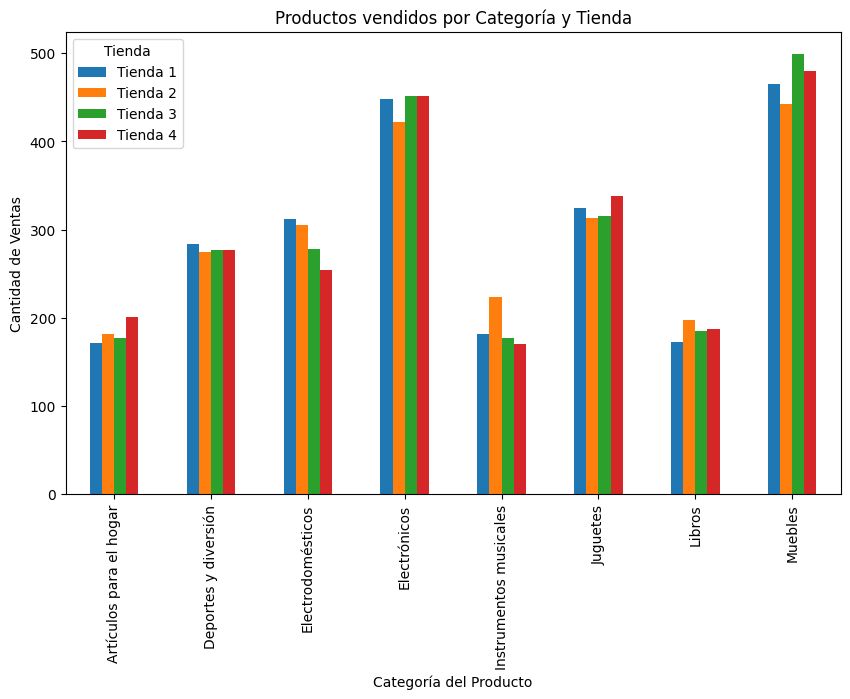

In [85]:
# Categorías por tienda
categorias_df.pivot(index="Categoría del Producto", columns="Tienda", values="Cantidad").plot(kind="bar", figsize=(10,6))
plt.title("Productos vendidos por Categoría y Tienda")
plt.ylabel("Cantidad de Ventas")
plt.show()


# 3. Calificación promedio de la tienda


In [86]:
calificaciones_df = pd.DataFrame({
    "Tienda": list(tiendas.keys()),
    "Calificación Promedio": [df["Calificación"].mean() for df in tiendas.values()]
})

print(calificaciones_df)

     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


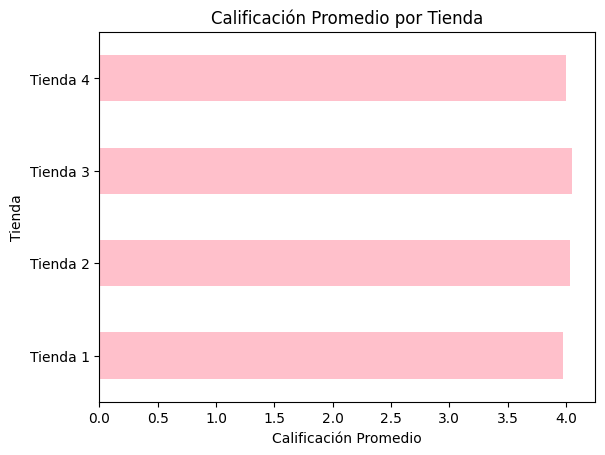

In [87]:
# Calificaciones
calificaciones_df.plot(kind="barh", x="Tienda", y="Calificación Promedio", legend=False, title="Calificación Promedio por Tienda", color="pink")
plt.xlabel("Calificación Promedio")
plt.show()

# 4. Productos más y menos vendidos

In [88]:
ventas_df = pd.concat([
    df["Producto"].value_counts().reset_index()
      .rename(columns={"index": "Producto", "Producto": "Cantidad Vendida"})
      .assign(Tienda=tienda)
    for tienda, df in tiendas.items()
])

print("Top 3 más vendidos por tienda:")
print(ventas_df.groupby("Tienda").head(3))

print("\nTop 3 menos vendidos por tienda:")
print(ventas_df.groupby("Tienda").tail(3))

Top 3 más vendidos por tienda:
            Cantidad Vendida  count    Tienda
0                 Microondas     60  Tienda 1
1              TV LED UHD 4K     60  Tienda 1
2                    Armario     60  Tienda 1
0  Iniciando en programación     65  Tienda 2
1                 Microondas     62  Tienda 2
2                    Batería     61  Tienda 2
0              Kit de bancas     57  Tienda 3
1            Mesa de comedor     56  Tienda 3
2                  Cama king     56  Tienda 3
0                   Cama box     62  Tienda 4
1                 Cubertería     59  Tienda 4
2    Dashboards con Power BI     56  Tienda 4

Top 3 menos vendidos por tienda:
             Cantidad Vendida  count    Tienda
48            Olla de presión     35  Tienda 1
49  Auriculares con micrófono     33  Tienda 1
50               Celular ABXY     33  Tienda 1
48            Mesa de comedor     34  Tienda 2
49                  Impresora     34  Tienda 2
50              Juego de mesa     32  Tienda 2
48      

# 5. Envío promedio por tienda

In [89]:
costos_envio_df = pd.DataFrame({
    "Tienda": list(tiendas.keys()),
    "Costo Envío Promedio": [df["Costo de envío"].mean() for df in tiendas.values()]
})

print(costos_envio_df)

     Tienda  Costo Envío Promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


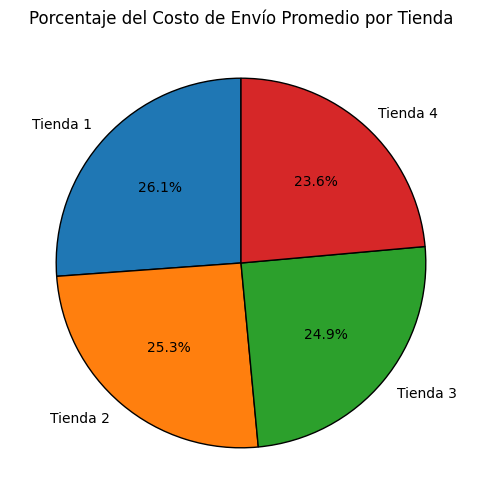

In [90]:
plt.figure(figsize=(6,6))
plt.pie(
    costos_envio_df["Costo Envío Promedio"],      # valores
    labels=costos_envio_df["Tienda"],             # etiquetas
    autopct='%1.1f%%',                            # mostrar porcentajes
    startangle=90,                                # comienzo desde arriba
    wedgeprops={"edgecolor":"black"}              # borde negro
)
plt.title("Porcentaje del Costo de Envío Promedio por Tienda")
plt.show()

# **Informe final**

El objetivo de este análisis fue determinar en qué tienda debería vender sus productos el Sr. Juan. Para esto, se evaluaron los ingresos totales, las categorías más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos y los costos de envío promedio de cada tienda. Con esta información se busca identificar la tienda con mayor potencial de rentabilidad y satisfacción del cliente.


# *Desarrollo del análisis*

1. Ingresos Totales

Tienda 1: 1,150,880,000

Tienda 2: 1,116,344,000

Tienda 3: 1,098,020,000

Tienda 4: 1,038,376,000


De este analisis podemos destacar que la Tienda 1 tiene el mayor ingreso total, seguida de cerca por Tienda 2 y Tienda 3. La Tienda 4 es la que presenta los ingresos más bajos.



2. Categorías de Productos más y menos vendidas

En este punto podemos observar que todas las tiendas mantienen un comportamiento similar, podemos destacar que:

Los productos más vendidos son: Muebles y Electrónicos.

Los productos menos vendidos: Instrumentos musicales y Libros.

Esto muestra que las categorías fuertes son consistentes entre tiendas, lo que indica estabilidad de mercado. El Sr. Juan debería considerar si sus productos se alinean con Muebles y Electrónicos, que concentran la mayor demanda.



3. Calificaciones Promedio

Tienda 1: 3.98

Tienda 2: 4.04

Tienda 3: 4.05

Tienda 4: 4.00

La tienda 3 y la tienda 2 presentan las mejores calificaciones, indicando mejor satisfacción y experiencia de compra para los clientes.



4. Productos más y menos vendidos

Productos más vendidos:

Tienda 1 → Microondas, TV LED UHD 4K, Armario.

Tienda 2 → Iniciando en programación, Microondas, Batería.

Tienda 3 → Kit de bancas, Mesa de comedor, Cama king.

Tienda 4 → Cama box, Cubertería, Dashboards con Power BI.

Productos menos vendidos:

Tienda 1 → Olla de presión, Auriculares con micrófono, Celular ABXY.

Tienda 2 → Mesa de comedor, Impresora, Juego de mesa.

Tienda 3 → Mochila, Microondas, Bloques de construcción.

Tienda 4 → Guitarra acústica, Armario, Guitarra eléctrica.

Las preferencias cambian según la tienda. Sin embargo, los productos de hogar y electrónicos se repiten en posiciones de mayor venta.



5. Costos de Envío Promedio

Tienda 1: 26,018

Tienda 2: 25,216

Tienda 3: 24,805

Tienda 4: 23,459

La tienda 4 tiene los costos de envío más bajos, lo que la hace competitiva en este aspecto. La tienda 1, en contraste, es la más cara.

# *Conclusión y Recomendación*

Tras analizar los resultados:

La tienda 1 es la que destaca en cuanto a los ingresos, pero por otro lado tiene el costo de envío más alto y una calificación promedio más baja frente a otras tiendas.

La tienda 2 y la tienda 3 presentan un buen equilibrio entre ingresos, satisfacción del cliente y categorías fuertes, lo que las hace muy competitivas.

Por ultimo la tienda 4 tiene los costos de envío más bajos, pero sus ingresos son significativamente menores y la satisfacción no sobresale.



# *✔ Recomendación Final:*
El Sr. Juan debería vender en **Tienda 3**, ya que combina:

Calificación promedio más alta (4.05).

Buena facturación (casi al nivel de las tiendas 1 y 2).

Categorías alineadas con la demanda del mercado (Muebles y Electrónicos).

Costos de envío competitivos (24,805, mejores que las tienda 1 y 2).

De esta manera, la tienda 3 ofrece el mejor balance entre rentabilidad, costos y satisfacción del cliente, lo cual maximiza las posibilidades de éxito.